In [2]:
import czifile
import PIL
from PIL import Image
import aicsimageio
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter
from aicsimageio.writers import OmeZarrWriter
from aicsimageio.readers import CziReader

In [3]:
from ome_zarr.io import parse_url
from ome_zarr.writer import write_image

In [4]:
import pandas as pd
import numpy as np 
import dask
import tifffile as tf
import STalign
from STalign import STalign

In [9]:
z8="/path/to/czi/image.czi/"

In [57]:
z8_img=aicsimageio.AICSImage(z8)

In [12]:
z8_img=aicsimageio.AICSImage(z8)

In [15]:
z8_img.dask_data

dask.array<transpose, shape=(1, 4, 1, 72041, 64419), dtype=uint8, chunksize=(1, 4, 1, 5792, 5792), chunktype=numpy.ndarray>

In [1]:
# Define the path to the CZI image file
czi_path = "/stornext/Bioinf/data/lab_brain_cancer/users/j_kriel/Confocal/Venture_2_1/6687_Bottom/Venture_PT2_6687_bottom-05-Orthogonal Projection-01.czi"

# Read the CZI image file
#czi_data = czifile.imread(czi_path)

# Convert the CZI data to a PIL Image object
#image = aicsimageio.AICSImage(czi_path)




In [17]:
mosaic=z8_img.get_mosaic_tile_positions(C=0)
mosaic

[(9, 12289),
 (7, 14757),
 (3, 17215),
 (2, 19677),
 (0, 22143),
 (0, 24602),
 (2474, 24606),
 (2475, 22150),
 (2477, 19679),
 (2480, 17216),
 (2481, 14758),
 (2482, 12293),
 (2482, 9824),
 (4953, 9827),
 (4953, 12295),
 (4952, 14758),
 (4952, 17219),
 (4949, 19682),
 (4946, 22148),
 (4946, 24609),
 (4945, 27074),
 (7417, 29538),
 (7420, 27078),
 (7420, 24614),
 (7420, 22153),
 (7423, 19684),
 (7425, 17222),
 (7426, 14764),
 (7428, 12296),
 (7429, 9831),
 (7426, 7372),
 (9907, 7375),
 (9909, 9838),
 (9908, 12303),
 (9907, 14764),
 (9906, 17226),
 (9903, 19688),
 (9900, 22158),
 (9899, 24618),
 (9901, 27082),
 (9898, 29541),
 (9897, 32011),
 (12373, 34476),
 (12375, 32010),
 (12375, 29542),
 (12378, 27084),
 (12377, 24615),
 (12380, 22159),
 (12381, 19693),
 (12384, 17231),
 (12385, 14765),
 (12386, 12304),
 (12388, 9838),
 (12385, 7374),
 (14863, 4911),
 (14862, 7378),
 (14864, 9839),
 (14863, 12305),
 (14862, 14769),
 (14861, 17234),
 (14860, 19695),
 (14858, 22164),
 (14857, 24623),


In [18]:
np.savetxt('/stornext/Bioinf/data/lab_brain_cancer/projects/tme_spatial/venture_multi_omics/venture_pt2/6687_bottom_tiles.csv',mosaic, delimiter=',', fmt='%s')

In [95]:
z2_df=pd.DataFrame((mosiac),columns=['x', 'y'])

In [10]:
image=aicsimageio.AICSImage(czi_path)

In [24]:
image

<AICSImage [Reader: CziReader, Image-is-in-Memory: False]>

In [12]:
image.mosaic_tile_dims

<Dimensions [Y: 2748, X: 2748]>

In [46]:
XI=np.array(range(image.shape[1])) * 1.
YI=np.array(range(image.shape[2])) * 1.
extentI = STalign.extent_from_x((YI, XI))

In [ ]:
XJ, YJ, M, fig = STalign.rasterize(XI, YI, dx=5)

np.savez("/stornext/Bioinf/data/lab_brain_cancer/projects/tme_spatial/venture_multi_omics/venture_pt2/6694_bottom.npz", x=XI, y=YI, I=image)

In [15]:
tile_pos=image.get_mosaic_tile_positions(C=0)
np.savetxt('/stornext/Bioinf/data/lab_brain_cancer/projects/tme_spatial/venture_multi_omics/venture_pt2/z2_tile_coordinates.csv',tile_pos, delimiter=',', fmt='%s')

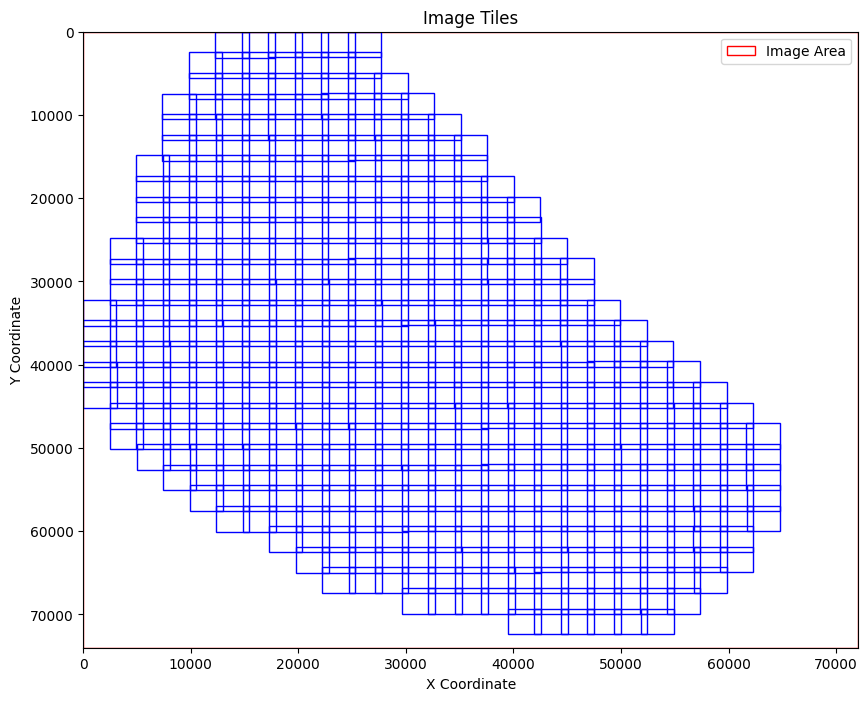

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
coordinates_path = '/stornext/Bioinf/data/lab_brain_cancer/projects/tme_spatial/venture_multi_omics/venture_pt2/6687_bottom_tiles.csv'
coordinates = pd.read_csv(coordinates_path, header=None)
coordinates.columns = ['x', 'y']  # Assuming the first column is 'x' and the second is 'y'
# Image dimensions
image_width, image_height = 72041, 74000

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot a rectangle representing the image
image_rect = patches.Rectangle((0, 0), image_width, image_height, linewidth=1, edgecolor='r', facecolor='none', label='Image Area')
ax.add_patch(image_rect)

# Plot rectangles for each tile based on the coordinates
for index, row in coordinates.iterrows():
    x, y = row[1], row[0]  # Assuming the first column is 'x' and the second is 'y'
    tile_rect = patches.Rectangle((x, y), 3092, 3092, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(tile_rect)

# Set the plot limits and labels
ax.set_xlim(0, image_width)
ax.set_ylim(0, image_height)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Image Tiles')
plt.gca().invert_yaxis()  # Invert Y axis to match image coordinates
plt.legend()
plt.show()